# Notebook that compares sarsa vs q-learning for Gridworld
### by Jorge Ramirez-Ruiz

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import imageio

In [220]:
from mpl_toolkits import mplot3d
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Gridworld example: sarsa($\lambda$) vs q-learning 
Actions: 0 = north, 1 = east, 2 = south, 3 = west

In [2]:
def greedy_policy(s_x,s_y,q,ϵ,state_side):
    a = 0
    possible_actions = legal_actions(s_x,s_y,state_side) 
    if np.random.rand() < ϵ:
        a = np.random.choice(range(np.size(possible_actions)))
    else:
        a = np.argmax(q[s_x,s_y,possible_actions]) 
    return possible_actions[a]

In [3]:
def legal_actions(s_x,s_y,side_length):
    actions = np.array([], dtype = np.int64)
    #One side
    if s_x == 0:
        actions = np.append(actions,1)
        #Corner
        if s_y == 0:
            actions = np.append(actions,0)
        #Other corner
        elif s_y == side_length - 1:
            actions = np.append(actions,2)
        #Side
        else:
            actions = np.append(actions,[0,2])
    #Other side
    elif s_x == side_length - 1:
        actions = np.append(actions,3)
        #Corner
        if s_y == 0:
            actions = np.append(actions,0)
        #Other corner
        elif s_y == side_length - 1:
            actions = np.append(actions,2)
        #Side
        else:
            actions = np.append(actions,[0,2])
    elif s_y == 0:
        actions = np.append(actions, [0,1,3])
    elif s_y == side_length - 1:
        actions = np.append(actions, [1,2,3])
    else:
        actions = np.append(actions, [0,1,2,3])
        
    return actions

In [4]:
def dynamics(s_x,s_y,action):
    s_x_p,s_y_p = s_x,s_y
    if action == 0:
        s_y_p += 1
    elif action == 1:
        s_x_p += 1
    elif action == 2:
        s_y_p -= 1
    elif action == 3:
        s_x_p -= 1
    return s_x_p,s_y_p

In [114]:
def reward(s_x,s_y,reward_x,reward_y):
    rew = 0
    if s_x == reward_x and s_y == reward_y:
        rew = 0
    else:
        rew = -1
    return rew

## Sarsa($\lambda$) 

In [133]:
def sarsa_λ(n_episodes,state_side,reward_x,reward_y, α, λ, ϵ = 0.1):
    Q = np.zeros((state_side,state_side,4))
    traj_init_x = np.array([])
    traj_init_y = np.array([])
    traj_inter_x = np.array([])
    traj_inter_y = np.array([])
    traj_final_x = np.array([])
    traj_final_y = np.array([])
    n_steps = np.array([])
    for i in range(n_episodes):
        #print("episode = ", i, "\n")
        E = np.zeros((state_side,state_side,4))
        if i == 0 or i == 9 or i == n_episodes-1:
            s_x,s_y = 2,2
        else:
            s_x,s_y = np.random.randint(0,state_side),np.random.randint(0,state_side) #2,2
        #
        if i == 0:
            traj_init_x = np.append(traj_init_x,s_x)
            traj_init_y = np.append(traj_init_y,s_y)
        if i == 9:
            traj_inter_x = np.append(traj_inter_x,s_x)
            traj_inter_y = np.append(traj_inter_y,s_y)
        if i == n_episodes-1:
            traj_final_x = np.append(traj_final_x,s_x)
            traj_final_y = np.append(traj_final_y,s_y)        
        action = np.random.choice(legal_actions(s_x,s_y,state_side)) 
        terminate = False
        #s_x_p,s_y_p,r,a_p = 0,0,0,0
        δ = 0
        t = 0
        while terminate == False:
            if s_x == reward_x and s_y == reward_y:
                n_steps = np.append(n_steps,t)
                terminate = True
            else:
                t +=1
                #Dynamics
                s_x_p,s_y_p = dynamics(s_x,s_y,action)
                #print("s_x_p = ", s_x_p, ", s_y_p = ", s_y_p, "\n")
                #print("legal actions from here = ", legal_actions(s_x_p,s_y_p,state_side), "\n")
                r = reward(s_x_p,s_y_p,reward_x,reward_y)
                a_p = greedy_policy(s_x_p,s_y_p,Q,ϵ/(i+1),state_side) 
                δ = r + Q[s_x_p,s_y_p,a_p] - Q[s_x,s_y,action]
                E[s_x,s_y,action] += 1
                Q += α*δ*E #also possible δ*E/t
                E *= λ
                s_x = s_x_p
                s_y = s_y_p
                action = a_p
                if i == 0:
                    traj_init_x = np.append(traj_init_x,s_x)
                    traj_init_y = np.append(traj_init_y,s_y)
                if i == 9:
                    traj_inter_x = np.append(traj_inter_x,s_x)
                    traj_inter_y = np.append(traj_inter_y,s_y)
                if i == n_episodes-1:
                    traj_final_x = np.append(traj_final_x,s_x)
                    traj_final_y = np.append(traj_final_y,s_y)
                #print("s_x = ", s_x, ", s_y = ", s_y ,", action = ", action , "\n")
    return Q, n_steps, [traj_init_x,traj_init_y], [traj_final_x,traj_final_y] # [traj_inter_x,traj_inter_y]

In [134]:
state_side = 8
n_episodes = 1000
reward_x = 6
reward_y = 6
ϵ = 1
λ = 0.8
α = 0.1
q, steps_sarsa, initial, final = sarsa_λ(n_episodes,state_side, reward_x, reward_y, α, λ, ϵ)

In [117]:
steps_sarsa[0]

40.0

In [118]:
len(initial[0]),len(final[0])

(41, 9)

Gif for initial

In [237]:
arrows_x = np.zeros(len(initial[0]))
arrows_y = np.zeros(len(initial[1]))
#colors = np.linspace(0,len(initial[0]),len(initial[0])+1)
for i in range(len(initial[1])-1):
    arrows_x[i] = initial[0][i+1]-initial[0][i]
    arrows_y[i] = initial[1][i+1]-initial[1][i]

xs = np.linspace(-0.5, state_side+0.5, state_side+2)
ys = np.linspace(-0.5, state_side+0.5, state_side+2)
for i in range(len(initial[1])):
    ax = plt.gca()
    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color='black', alpha=.33, linestyle='-')
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color='black', alpha=.33, linestyle='-')

    ax.axis('off')
    plt.title('Episode = 1, λ = '+str(λ)+', ϵ = 1, α = '+str(α))
    plt.plot(reward_x,reward_y,'ro',markersize = 10)

    plt.quiver(initial[0][i],initial[1][i],arrows_x[i],arrows_y[i])
    plt.savefig('./sarsa_lambda/initial'+str(state_side)+'/c_plot'+str(i)+'.png')
    plt.clf()
n = len(initial[0])
gif_path = "./sarsa_lambda/c_initial"+str(state_side)+".gif"
frames_path = "./sarsa_lambda/initial"+str(state_side)+"/c_plot{i}.png"
with imageio.get_writer(gif_path, mode='I') as writer:
    for i in range(n):
        writer.append_data(imageio.imread(frames_path.format(i=i)))

<Figure size 432x288 with 0 Axes>

Gif for intermediate

In [15]:
arrows_x = np.zeros(len(inter[0]))
arrows_y = np.zeros(len(inter[1]))
#colors = np.linspace(0,len(initial[0]),len(initial[0])+1)
for i in range(len(inter[1])-1):
    arrows_x[i] = inter[0][i+1]-inter[0][i]
    arrows_y[i] = inter[1][i+1]-inter[1][i]

xs = np.linspace(-0.5, state_side+0.5, state_side+2)
ys = np.linspace(-0.5, state_side+0.5, state_side+2)
for i in range(len(inter[1])):
    ax = plt.gca()
    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color='black', alpha=.33, linestyle='-')
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color='black', alpha=.33, linestyle='-')

    ax.axis('off')
    plt.title('Episode = 10, λ = '+str(λ)+', ϵ = 1/10, α = '+str(α))
    plt.plot(reward_x,reward_y,'ro',markersize = 10)

    plt.quiver(inter[0][i],inter[1][i],arrows_x[i],arrows_y[i])
    plt.savefig('./sarsa_lambda/inter'+str(state_side)+'/plot'+str(i)+'.png')
    plt.clf()
n = len(inter[0])
gif_path = "./sarsa_lambda/inter"+str(state_side)+".gif"
frames_path = "./sarsa_lambda/inter"+str(state_side)+"/plot{i}.png"
with imageio.get_writer(gif_path, mode='I') as writer:
    for i in range(n):
        writer.append_data(imageio.imread(frames_path.format(i=i)))

<Figure size 432x288 with 0 Axes>

Gif for final

In [238]:
arrows_x = np.zeros(len(final[0]))
arrows_y = np.zeros(len(final[1]))
colors = np.linspace(0,len(final[0]),len(final[0])+1)
for i in range(len(final[1])-1):
    arrows_x[i] = final[0][i+1]-final[0][i]
    arrows_y[i] = final[1][i+1]-final[1][i]
    
xs = np.linspace(-0.5, state_side+0.5, state_side+2)
ys = np.linspace(-0.5, state_side+0.5, state_side+2)
for i in range(len(final[1])):
    ax = plt.gca()
    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color='black', alpha=.33, linestyle='-')
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color='black', alpha=.33, linestyle='-')

    ax.axis('off')
    plt.title('Episode = '+str(n_episodes)+', λ = '+str(λ)+', ϵ = 1/'+str(n_episodes)+', α = '+str(α))
    plt.plot(reward_x,reward_y,'ro',markersize = 10)

    plt.quiver(final[0][i],final[1][i],arrows_x[i],arrows_y[i])
    plt.savefig('./sarsa_lambda/final'+str(state_side)+'/c_plot'+str(i)+'.png')
    plt.clf()
#plt.show()
n = len(final[0])
gif_path = "./sarsa_lambda/c_final"+str(state_side)+".gif"
frames_path = "./sarsa_lambda/final"+str(state_side)+"/c_plot{i}.png"
with imageio.get_writer(gif_path, mode='I') as writer:
    for i in range(n):
        writer.append_data(imageio.imread(frames_path.format(i=i)))

<Figure size 432x288 with 0 Axes>

## Q-learning

In [135]:
def q_learning(n_episodes,state_side,reward_x,reward_y, α, ϵ = 0.1):
    Q = np.zeros((state_side,state_side,4)) 
    traj_init_x = np.array([])
    traj_init_y = np.array([])
    traj_final_x = np.array([])
    traj_final_y = np.array([])
    n_steps = np.array([])
    for i in range(n_episodes):
        #print("episode = ", i, "\n")
        if i == 0 or i == n_episodes-1:
            s_x,s_y = 2,2
        else:
            s_x,s_y = np.random.randint(0,state_side),np.random.randint(0,state_side) #2,2 #
        #
        if i == 0:
            traj_init_x = np.append(traj_init_x,s_x)
            traj_init_y = np.append(traj_init_y,s_y)
        if i == n_episodes-1:
            traj_final_x = np.append(traj_final_x,s_x)
            traj_final_y = np.append(traj_final_y,s_y)        
        #action = np.random.choice(legal_actions(s_x,s_y,state_side)) 
        terminate = False
        #s_x_p,s_y_p,r,a_p = 0,0,0,0
        δ = 0
        t = 0
        while terminate == False:
            if s_x == reward_x and s_y == reward_y:
                n_steps = np.append(n_steps,t)
                terminate = True
            else:
                t +=1
                #ϵ-greedy is our behaviour policy
                a_p = greedy_policy(s_x,s_y,Q,ϵ/(i+1),state_side) 
                s_x_p,s_y_p = dynamics(s_x,s_y,a_p)
                #print("s_x_p = ", s_x_p, ", s_y_p = ", s_y_p, "\n")
                #print("legal actions from here = ", legal_actions(s_x_p,s_y_p,state_side), "\n")
                r = reward(s_x_p,s_y_p,reward_x,reward_y)
                #look at best action from state s_p given legal actions, greedy policy is target policy
                legal = legal_actions(s_x_p,s_y_p,state_side)
                δ = r + np.amax(Q[s_x_p,s_y_p,legal]) - Q[s_x,s_y,a_p]
                Q[s_x,s_y,a_p] += α*δ 
                s_x = s_x_p
                s_y = s_y_p
                if i == 0:
                    traj_init_x = np.append(traj_init_x,s_x)
                    traj_init_y = np.append(traj_init_y,s_y)
                if i == n_episodes-1:
                    traj_final_x = np.append(traj_final_x,s_x)
                    traj_final_y = np.append(traj_final_y,s_y)
                #print("s_x = ", s_x, ", s_y = ", s_y ,", action = ", action , "\n")
    return Q, n_steps, [traj_init_x,traj_init_y], [traj_final_x,traj_final_y]

In [136]:
state_side = 8
n_episodes = 1000
reward_x = 6
reward_y = 6
ϵ = 1
α = 0.1
q_l, steps_q_learning, initial_q, final_q = q_learning(n_episodes,state_side, reward_x, reward_y, α, ϵ)

In [121]:
len(initial_q[0]),len(final_q[0])

(127, 11)

Gif for initial

In [235]:
arrows_x = np.zeros(len(initial_q[0]))
arrows_y = np.zeros(len(initial_q[1]))
#colors = np.linspace(0,len(initial[0]),len(initial[0])+1)
for i in range(len(initial_q[1])-1):
    arrows_x[i] = initial_q[0][i+1]-initial_q[0][i]
    arrows_y[i] = initial_q[1][i+1]-initial_q[1][i]

xs = np.linspace(-0.5, state_side+0.5, state_side+2)
ys = np.linspace(-0.5, state_side+0.5, state_side+2)
plt.rc("text", usetex=False)
for i in range(len(initial_q[1])):
    ax = plt.gca()
    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color='black', alpha=.33, linestyle='-')
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color='black', alpha=.33, linestyle='-')

    ax.axis('off')
    plt.title('Episode = 1, ϵ = 1, α = '+str(α))
    plt.plot(reward_x,reward_y,'ro',markersize = 10)

    plt.quiver(initial_q[0][i],initial_q[1][i],arrows_x[i],arrows_y[i])
    plt.savefig('./q-learning/initial'+str(state_side)+'/c_plot'+str(i)+'.png')
    plt.clf()
n = len(initial_q[0])
gif_path = "./q-learning/c_initial"+str(state_side)+".gif"
frames_path = "./q-learning/initial"+str(state_side)+"/c_plot{i}.png"
with imageio.get_writer(gif_path, mode='I') as writer:
    for i in range(n):
        writer.append_data(imageio.imread(frames_path.format(i=i)))

/Users/jorgeramirezruiz/anaconda/envs/py371/lib/python3.7/site-packages/matplotlib/quiver.py:665: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jorgeramirezruiz/anaconda/envs/py371/lib/python3.7/site-packages/matplotlib/quiver.py:665: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


<Figure size 432x288 with 0 Axes>

In [239]:
arrows_x = np.zeros(len(final_q[0]))
arrows_y = np.zeros(len(final_q[1]))
colors = np.linspace(0,len(final_q[0]),len(final_q[0])+1)
for i in range(len(final_q[1])-1):
    arrows_x[i] = final_q[0][i+1]-final_q[0][i]
    arrows_y[i] = final_q[1][i+1]-final_q[1][i]
    
xs = np.linspace(-0.5, state_side+0.5, state_side+2)
ys = np.linspace(-0.5, state_side+0.5, state_side+2)
plt.rc("text", usetex=False)
for i in range(len(final_q[1])):
    ax = plt.gca()
    # grid lines
    for x in xs:
        plt.plot([x, x], [ys[0], ys[-1]], color='black', alpha=.33, linestyle='-')
    for y in ys:
        plt.plot([xs[0], xs[-1]], [y, y], color='black', alpha=.33, linestyle='-')

    ax.axis('off')
    plt.title('Episode = '+str(n_episodes)+', ϵ = 1/'+str(n_episodes)+', α = '+str(α))
    plt.plot(reward_x,reward_y,'ro',markersize = 10)

    plt.quiver(final_q[0][i],final_q[1][i],arrows_x[i],arrows_y[i])
    plt.savefig('./q-learning/final'+str(state_side)+'/c_plot'+str(i)+'.png')
    plt.clf()
#plt.show()
n = len(final_q[0])
gif_path = "./q-learning/c_final"+str(state_side)+".gif"
frames_path = "./q-learning/final"+str(state_side)+"/c_plot{i}.png"
with imageio.get_writer(gif_path, mode='I') as writer:
    for i in range(n):
        writer.append_data(imageio.imread(frames_path.format(i=i)))

<Figure size 432x288 with 0 Axes>

## Comparison

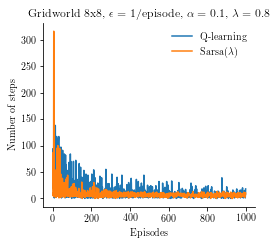

In [233]:
widthCM = 10
heightCM = 9
f = plt.figure(figsize=(widthCM/2.54, heightCM/2.54), dpi=72)
ax = plt.gca()
plt.rc("text", usetex=True)
plt.rc("font",family="serif", serif = "Computer Modern")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.plot(steps_q_learning, label = "Q-learning")
plt.plot(steps_sarsa,label="Sarsa($\lambda$)")
plt.title(r'Gridworld 8x8, $\epsilon$ = 1/episode, $\alpha = 0.1$, $\lambda = 0.8$')
plt.xlabel("Episodes")
plt.ylabel("Number of steps")
plt.tight_layout(rect = [0.01, 0.01, 1, 1])
plt.legend(frameon=False)
plt.savefig("sarsa-lambda_v_q-learning_8.pdf")

## Q-surface

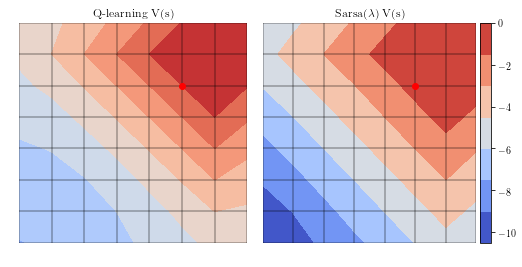

In [231]:
widthCM = 18
heightCM = 9
side_length = 8
fig = plt.figure(figsize=(widthCM/2.54, heightCM/2.54), dpi=72)
plt.rc("text", usetex=True)
plt.rc("font",family="serif", serif = "Computer Modern")

ax1 = fig.add_subplot(1, 2, 1)#,projection = '3d')
#ax = plt.axes(projection='3d')
#ax = fig.gca(projection='3d')
xs = np.linspace(1, state_side, state_side)
ys = np.linspace(1, state_side, state_side)
for x in xs:
    ax1.plot([x, x], [ys[0], ys[-1]], color='black', alpha=.33, linestyle='-')
for y in ys:
    ax1.plot([xs[0], xs[-1]], [y, y], color='black', alpha=.33, linestyle='-')
ax1.axis('off')
x = np.outer(np.linspace(1, state_side,state_side), np.ones(state_side))
y = x.copy().T
v = np.zeros([side_length,side_length])
for s_x in range(side_length):
    for s_y in range(side_length):
        acts = legal_actions(s_x,s_y,side_length)
        v[s_x,s_y] = np.max(q_l[s_x,s_y,acts])
        
surf = ax1.contourf(x, y, v, cmap = cm.coolwarm, vmin = -10, vmax = 0)
ax1.plot([6],[6],"ro")
#plt.grid(True)
#surf = ax1.plot_surface(x, y, v, cmap = cm.coolwarm)
ax1.set_title('Q-learning V(s)')
#fig.colorbar(surf, ticks = [0, -2, -4, -6, -8, -10], shrink=0.5, aspect=5)

ax2 = fig.add_subplot(1, 2, 2)#, projection = '3d')

xs = np.linspace(1, state_side, state_side)
ys = np.linspace(1, state_side, state_side)
for x_i in xs:
    ax2.plot([x_i, x_i], [ys[0], ys[-1]], color='black', alpha=.33, linestyle='-')
for y_i in ys:
    ax2.plot([xs[0], xs[-1]], [y_i, y_i], color='black', alpha=.33, linestyle='-')
ax2.axis('off')
v2 = np.zeros([side_length,side_length])
for s_x in range(side_length):
    for s_y in range(side_length):
        acts = legal_actions(s_x,s_y,side_length)
        v2[s_x,s_y] = np.max(q[s_x,s_y,acts])
#legal_actions(s_x,s_y,side_length)
#v2 = np.max(q,axis = 2)
surf2 = ax2.contourf(x, y, v2, cmap = cm.coolwarm, vmin = -10, vmax = 0)
ax2.plot([6],[6],"ro")
ax2.set_title(r'Sarsa($\lambda$) V(s)')
divider = make_axes_locatable(ax2)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(surf2, cax=cax1, ticks = [0, -2, -4, -6, -8, -10])

#fig.colorbar(surf2, ticks = [0, -2, -4, -6, -8, -10], shrink=0.5, aspect=3)
plt.tight_layout(0.1,0.1,0.1)

plt.savefig("./value_functions.pdf")

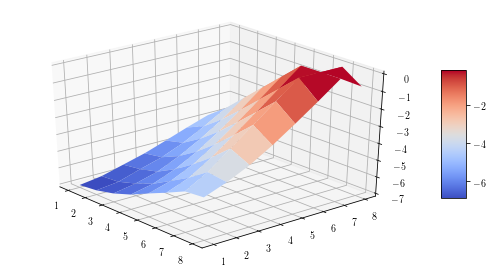

In [232]:
fig = plt.figure(figsize=(widthCM/2.54, heightCM/2.54), dpi=72)
ax = mplot3d.Axes3D(fig)
ax.elev = 30
ax.azim = -40
# = plt.axes(projection='3d')
surf = ax.plot_surface(x, y, v, cmap = cm.coolwarm)
#ax.scatter([6],[6],[8],c="red",s = 100)
fig.colorbar(surf, shrink=0.5, aspect=5)